In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [10]:
# 구단별 No

# 1. kt wiz
# 2. 두산 베어스
# 3. 삼성 라이온즈
# 4. LG 트윈스
# 5. 키움히어로즈
# 6. SSG 랜더스
# 7. NC 다이노스
# 8. 롯데 자이언츠
# 9. 기아 타이거즈
# 10. 한화 이글스

In [11]:
bb = pd.read_csv("./Raw_First_Value.csv") 
bb

,team,year,month,pov,obp,slg,ba,era,whip
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60
...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40


In [12]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    534 non-null    int64  
 1   year    534 non-null    int64  
 2   month   534 non-null    int64  
 3   pov     534 non-null    float64
 4   obp     534 non-null    float64
 5   slg     534 non-null    float64
 6   ba      534 non-null    float64
 7   era     534 non-null    float64
 8   whip    534 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 37.7 KB


In [149]:
# 승률별 등급 차등 분류

def get_grade_1(pov):
    if pov>=0.60:
        grade = 4
    elif pov>=0.50:
        grade = 3
    elif pov>=0.40:
        grade = 2
    else:
        grade = 1
    return grade

def get_grade_2(pov):
    if pov>=0.51:
        grade = 1
    else:
        grade = 0
    return grade

## grade 1~4 기준 

In [14]:
# grade 1~4 기준 (Grade 4 = 0.60 이상 , Grade 3 = 0.50 이상 0.60 미만, Grade 2 = 0.40 이상 0.50 미만, Grade 1 = 0.40 미만)
bb['grade'] = bb['pov'].apply(lambda pov: get_grade_1(pov))
bb

,team,year,month,pov,obp,slg,ba,era,whip,grade
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92,1
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79,1
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58,1
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68,2
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60,2
...,...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46,3
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38,1
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47,1
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40,1


### corr

In [15]:
corr = bb.corr()
print(corr)

               team          year         month       pov       obp       slg  \
team   1.000000e+00 -1.216931e-13  1.684128e-17 -0.115621 -0.078452 -0.068407   
year  -1.216931e-13  1.000000e+00 -1.199418e-02 -0.001751 -0.179386 -0.299121   
month  1.684128e-17 -1.199418e-02  1.000000e+00 -0.004201  0.094359  0.069708   
pov   -1.156206e-01 -1.750906e-03 -4.201248e-03  1.000000  0.332913  0.316072   
obp   -7.845232e-02 -1.793857e-01  9.435866e-02  0.332913  1.000000  0.747138   
slg   -6.840687e-02 -2.991214e-01  6.970795e-02  0.316072  0.747138  1.000000   
ba    -1.170678e-01 -2.545450e-01  1.695144e-01  0.233210  0.862917  0.812916   
era    8.328565e-02 -1.628113e-01  7.797397e-02 -0.493769  0.195104  0.294633   
whip   9.793962e-02 -1.351297e-01  6.655080e-02 -0.455063  0.102360  0.160535   
grade -1.434019e-01 -1.462872e-02 -1.736043e-02  0.870339  0.342944  0.331619   

             ba       era      whip     grade  
team  -0.117068  0.083286  0.097940 -0.143402  
year  -0.254

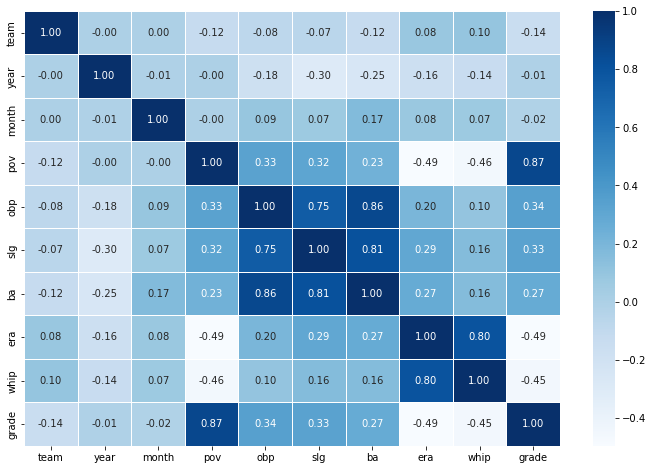

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data = bb.corr(), annot=True, fmt = '.2f', linewidths =.5, cmap='Blues');

<Figure size 864x432 with 0 Axes>

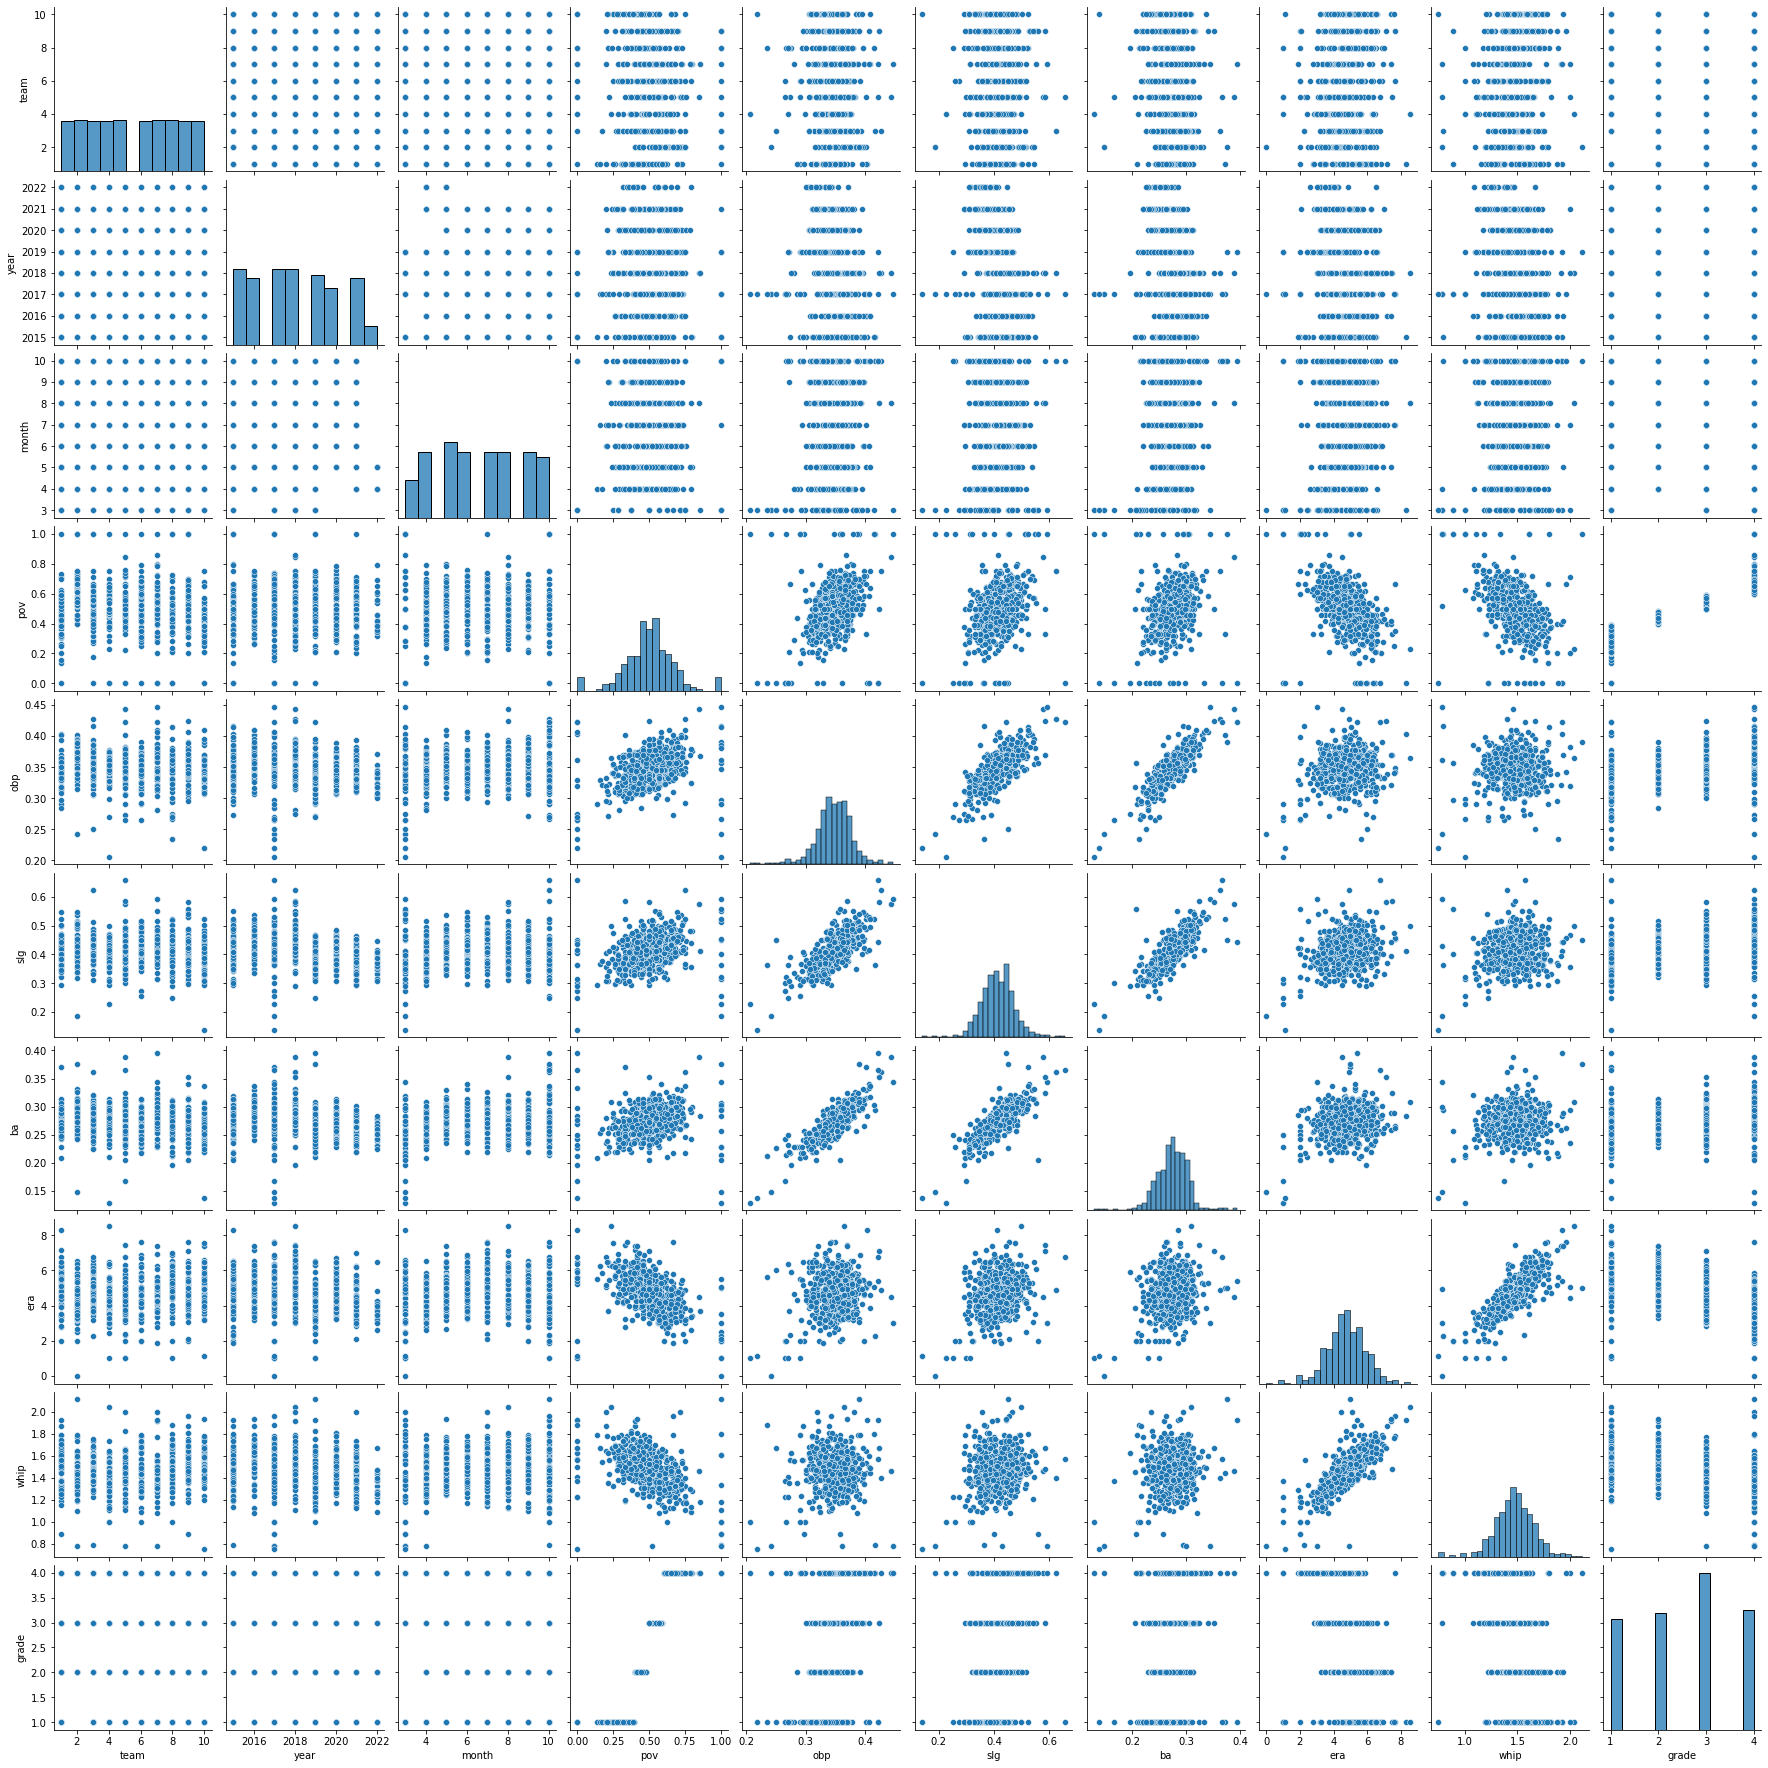

In [18]:
plt.figure(figsize=(12,6))
sns.pairplot(data=bb);

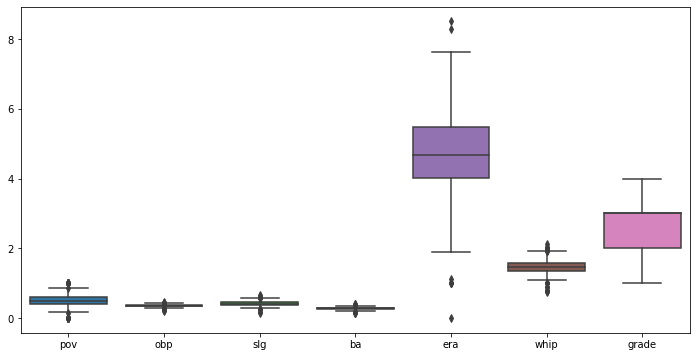

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=bb.iloc[:, 3:]);

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm=MinMaxScaler()
ss=StandardScaler()
rs=RobustScaler()

In [21]:
bb2=bb.copy()
bb2=bb2[['era']]
bb2

,era
0,8.28
1,5.52
2,5.72
3,5.93
4,5.73
...,...
529,4.33
530,4.92
531,4.18
532,4.00


In [28]:
bb_scaler=bb2.copy()
bb_scaler['MinMax']=mm.fit_transform(bb2)
bb_scaler['Standard']=ss.fit_transform(bb2)
bb_scaler['Robust']=rs.fit_transform(bb2)

In [29]:
bb_scaler

,era,MinMax,Standard,Robust
0,8.28,0.972973,3.094440,2.463122
1,5.52,0.648649,0.704870,0.569468
2,5.72,0.672150,0.878027,0.706690
3,5.93,0.696827,1.059842,0.850772
4,5.73,0.673325,0.886685,0.713551
...,...,...,...,...
529,4.33,0.508813,-0.325416,-0.246998
530,4.92,0.578143,0.185398,0.157804
531,4.18,0.491187,-0.455284,-0.349914
532,4.00,0.470035,-0.611125,-0.473413


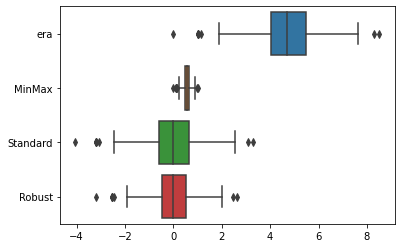

In [30]:
sns.boxplot(data=bb_scaler, orient='h');

### OLS

In [31]:
import statsmodels.api as sm

X = bb[['obp', 'slg', 'ba', 'era', 'whip']]
y = bb['grade']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  grade   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1340.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                   1.25e-297
Time:                        17:28:10   Log-Likelihood:                         -606.32
No. Observations:                 534   AIC:                                      1223.
Df Residuals:                     529   BIC:                                      1244.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
obp            9.7887      1.894      5.168      0.000       6.068      13.510
slg            7.5066      0.961      7.811      0.000       5.619       9.394
ba            -3.8902      2.542     -1.531      0.126      -8.883       1.103
era           -0.5745      0.046    -12.426      0.000      -0.665      -0.484
whip          -0.1232      0.244     -0.505      0.614      -0.603       0.356
==============================================================================
Omnibus:                        6.730   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.997
Skew:                          -0.207   Prob(JB):                       0.0302
Kurtosis:                       3.377   Cond. No.                         467.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.api as sm

X = bb[['obp', 'slg', 'ba', 'era', 'whip']]
y = bb['pov']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pov   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1898.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:28:10   Log-Likelihood:                          367.64
No. Observations:                 534   AIC:                                     -725.3
Df Residuals:                     529   BIC:                                     -703.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
obp            2.3687      0.306      7.748      0.000       1.768       2.969
slg            1.2685      0.155      8.178      0.000       0.964       1.573
ba            -1.5329      0.410     -3.737      0.000      -2.339      -0.727
era           -0.0910      0.007    -12.196      0.000      -0.106      -0.076
whip          -0.0010      0.039     -0.027      0.979      -0.078       0.076
==============================================================================
Omnibus:                       91.867   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.841
Skew:                          -0.346   Prob(JB):                    5.13e-215
Kurtosis:                       9.624   Cond. No.                         467.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#피쳐 변수 설정
feature_names= ['obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(bb, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(bb, columns=["pov"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    pov   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.05e-78
Time:                        17:28:14   Log-Likelihood:                 370.04
No. Observations:                 534   AIC:                            -728.1
Df Residuals:                     528   BIC:                            -702.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1741      0.080      2.187      0.0

In [34]:
#피쳐 변수 설정
feature_names= ['obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(bb, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(bb, columns=["grade"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           9.35e-80
Time:                        17:28:17   Log-Likelihood:                -605.98
No. Observations:                 534   AIC:                             1224.
Df Residuals:                     528   BIC:                             1250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4093      0.495      0.827      0.4

#### OLS 비교
* 상수 없음
  - grade : R-Squared : 0.927 / AIC : 1223
  - pov : R-Squared : 0.947 /AIC : -725.3
* 상수 있음
  - grade : R-Squared : 0.511 / AIC : 1224.
  - pov : R-Squared : 0.506 /AIC : -728.1

### Decision Tree

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [36]:
X=bb[['obp', 'slg', 'ba', 'era','whip']]
y=bb['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [37]:
cc = DecisionTreeClassifier(max_depth=4, random_state=13)
cc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [38]:
y_pred_tr = cc.predict(X_train)
y_pred_test = cc.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.579088471849866
Test Acc :  0.5217391304347826


#### test_size 비교
* 0.2 (max_depth=7)
  - Train Acc :  0.7892271662763466
  - Test Acc :  0.4672897196261682
* 0.3 (max_depth=7)
  - Train Acc :  0.7989276139410187
  - Test Acc :  0.546583850931677

In [41]:
from sklearn.model_selection import GridSearchCV
import pprint

params={'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
baseball=DecisionTreeClassifier(random_state=13)

gridsearch=GridSearchCV(estimator=baseball, param_grid=params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]})

In [42]:
pp=pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_) 

{   'mean_fit_time': array([0.004388  , 0.00618291, 0.00358996, 0.00299191, 0.0027925 ,
       0.00338945, 0.00359001, 0.00319691, 0.00338969, 0.00458636,
       0.00398583, 0.00359516, 0.0038013 , 0.00379   , 0.00379658]),
    'mean_score_time': array([0.00139651, 0.00180101, 0.00199628, 0.00199447, 0.00159593,
       0.00119715, 0.00139632, 0.00159769, 0.00178881, 0.00159211,
       0.0009932 , 0.00158978, 0.00139108, 0.00139556, 0.00120387]),
    'mean_test_score': array([0.35009698, 0.38950802, 0.43627226, 0.46249339, 0.44752248,
       0.47935108, 0.50186916, 0.46244049, 0.47935108, 0.46434491,
       0.4587198 , 0.45122553, 0.46993476, 0.46430965, 0.46432728]),
    'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 1},


In [43]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=7, random_state=13)

#### best_estimator: max_depth=7

In [44]:
cc = DecisionTreeClassifier(max_depth=7, random_state=13)
cc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=13)

In [45]:
y_pred_tr = cc.predict(X_train)
y_pred_test = cc.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7989276139410187
Test Acc :  0.546583850931677


In [68]:
# 분류기 성능 return 하는 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval_m(y_test, pred):
    acc=accuracy_score(y_test, pred)
    pre=precision_score(y_test, pred, average='micro')
    re=recall_score(y_test, pred, average='micro')
    f1=f1_score(y_test, pred, average='micro')
    pred_proba=cc.predict_proba(X_test)
    auc=roc_auc_score(y_test, pred_proba, multi_class='ovr')
    
    return acc, pre, re, f1, auc

In [69]:
# 분류기 성능 return 하는 함수
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval_w(y_test, pred):
    acc=accuracy_score(y_test, pred)
    pre=precision_score(y_test, pred, average='weighted')
    re=recall_score(y_test, pred, average='weighted')
    f1=f1_score(y_test, pred, average='weighted')
    pred_proba=cc.predict_proba(X_test)
    auc=roc_auc_score(y_test, pred_proba, multi_class='ovr')
    
    return acc, pre, re, f1, auc

In [76]:
from sklearn.metrics import confusion_matrix

def print_clf_eval_m(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc, pre, re, f1, auc = get_clf_eval_m(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=========')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f},  F1_1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [77]:
from sklearn.metrics import confusion_matrix

def print_clf_eval_w(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc, pre, re, f1, auc = get_clf_eval_w(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=========')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f},  F1_1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [73]:
get_clf_eval_m(y_test, y_pred_test)

(0.546583850931677,
 0.546583850931677,
 0.546583850931677,
 0.546583850931677,
 0.7123218727752929)

In [74]:
get_clf_eval_w(y_test, y_pred_test)

(0.546583850931677,
 0.5680829159090028,
 0.546583850931677,
 0.5436225882917753,
 0.7123218727752929)

In [79]:
print_clf_eval_m(y_test, y_pred_test), print_clf_eval_w(y_test, y_pred_test), 

=> confusion matrix
[[19 11  3  2]
 [12 16 10  0]
 [ 5  6 36  3]
 [ 1  4 16 17]]
Accuracy: 0.5466, Precision: 0.5466
Recall: 0.5466,  F1_1: 0.5466, AUC:0.7123
=> confusion matrix
[[19 11  3  2]
 [12 16 10  0]
 [ 5  6 36  3]
 [ 1  4 16 17]]
Accuracy: 0.5466, Precision: 0.5681
Recall: 0.5466,  F1_1: 0.5436, AUC:0.7123


(None, None)

c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


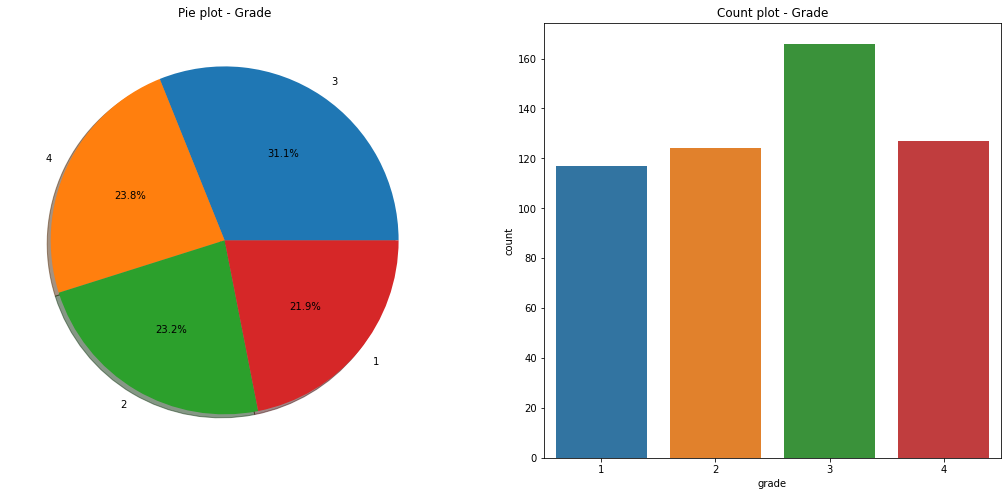

In [81]:
# 등급별로 얼마나 있는지 비율 확인

f, ax = plt.subplots(1, 2, figsize=(18, 8))

bb['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Grade')
ax[0].set_ylabel('')
sns.countplot('grade', data=bb, ax=ax[1])
ax[1].set_title('Count plot - Grade')

plt.show();

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.51      0.54      0.53        35
           2       0.43      0.42      0.43        38
           3       0.55      0.72      0.63        50
           4       0.77      0.45      0.57        38

    accuracy                           0.55       161
   macro avg       0.57      0.53      0.54       161
weighted avg       0.57      0.55      0.54       161



In [83]:
# 21.9 : 23.2 : 31.1 : 23.8
print(35/161), print(38/161), print(50/161), print(38/161)

0.21739130434782608
0.2360248447204969
0.3105590062111801
0.2360248447204969


(None, None, None, None)

In [84]:
# obp,slg,ba,era,whip

In [103]:
month6=pd.read_csv('2022yearcumul01.csv')
month6.sort_values(by=['POV'], ascending=False)

,team,OBP,SLG,BA,ERA,WHIP,POV,이름
3,6,0.330,0.370,0.249,3.56,1.21,0.661,ssg
2,5,0.326,0.365,0.246,3.49,1.26,0.600,키움
1,4,0.340,0.392,0.264,3.78,1.36,0.567,lg
0,9,0.350,0.409,0.269,4.03,1.34,0.542,기아
4,2,0.331,0.357,0.256,4.12,1.42,0.483,두산
7,3,0.321,0.365,0.260,3.86,1.39,0.483,삼성
5,1,0.326,0.352,0.247,3.58,1.24,0.475,kt
9,8,0.313,0.366,0.254,4.03,1.36,0.448,롯데
6,7,0.320,0.363,0.248,3.85,1.36,0.383,nc
8,10,0.317,0.355,0.242,5.30,1.53,0.361,한화


In [104]:
# grade 1~4 기준 (Grade 4 = 0.60 이상 , Grade 3 = 0.50 이상 0.60 미만, Grade 2 = 0.40 이상 0.50 미만, Grade 1 = 0.40 미만)
kia=np.array([[0.350,	0.409,	0.269,	4.03,	1.34]]) 
kium=np.array([[0.326,	0.365,	0.246,	3.49,	1.26]])
hanhwa=np.array([[0.317,	0.355,	0.242,	5.30,	1.53]])
ssg=np.array([[0.330,	0.370,	0.249,	3.56,	1.21]])
lotte=np.array([[0.313,	0.366,	0.254,	4.03,	1.36]])
lg=np.array([[0.340,	0.392,	0.264,	3.78,	1.36]]) 
dusan=np.array([[0.331,	0.357,	0.256,	4.12,	1.42]])
nc=np.array([[0.320,	0.363,	0.248,	3.85,	1.36]])
samsung=np.array([[0.321,	0.365,	0.260,	3.86,	1.39]])
kt=np.array([[0.326,	0.352,	0.247,	3.58,	1.24]])

print('1. ssg : ', cc.predict(ssg)),
print('2. kium :', cc.predict(kium)),
print('3. lg : ', cc.predict(lg)),
print('4. kia : ', cc.predict(kia)), 
print('5. dusan : ', cc.predict(dusan)),
print('6. samsung : ', cc.predict(samsung)), 
print('7. kt :', cc.predict(kt)), 
print('8. lotte: ', cc.predict(lotte)), 
print('9. nc :', cc.predict(nc)), 
print('10. hanhwa :', cc.predict(hanhwa))

1. ssg :  [3]
2. kium : [3]
3. lg :  [3]
4. kia :  [3]
5. dusan :  [3]
6. samsung :  [3]
7. kt : [3]
8. lotte:  [2]
9. nc : [3]
10. hanhwa : [1]


c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  

In [141]:
# 모델+data 있으면 성능 출력하는 함수
def get_result_m(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    return get_clf_eval_m(y_test, pred)

In [142]:
# 모델+data 있으면 성능 출력하는 함수
def get_result_w(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    return get_clf_eval_w(y_test, pred)

In [143]:
# 다수의 모델의 성능 출력하는 함수
def get_result_pd_m(models, model_names, X_train, y_train, X_test, y_test):
    col_names=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp=[]
    
    for model in models:
        tmp.append(get_result_m(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [144]:
# 다수의 모델의 성능 출력하는 함수
def get_result_pd_w(models, model_names, X_train, y_train, X_test, y_test):
    col_names=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp=[]
    
    for model in models:
        tmp.append(get_result_w(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

### 다른 모델 확인

In [111]:
pip install lightgbm


     ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression(random_state=13, solver='liblinear')
dt_clf=DecisionTreeClassifier(random_state=13, max_depth=7)
rf_clf=RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

In [145]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names=['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']
 
start_time=time.time()
results=get_result_pd_m(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time), print(results)

Fit time :  2.192945718765259
              accuracy  precision    recall        f1   roc_auc
LogisticReg   0.453416   0.453416  0.453416  0.453416  0.712322
DecisionTree  0.546584   0.546584  0.546584  0.546584  0.712322
RandomForest  0.552795   0.552795  0.552795  0.552795  0.712322
LightGBM      0.478261   0.478261  0.478261  0.478261  0.712322


(None, None)

In [147]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names=['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']
 
start_time=time.time()
results=get_result_pd_w(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)

c:\Users\sptt1\MiniConda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit time :  2.0002527236938477


In [148]:
print(results)

              accuracy  precision    recall        f1   roc_auc
LogisticReg   0.453416   0.355355  0.453416  0.396376  0.712322
DecisionTree  0.546584   0.568083  0.546584  0.543623  0.712322
RandomForest  0.552795   0.555158  0.552795  0.551223  0.712322
LightGBM      0.478261   0.472752  0.478261  0.473015  0.712322
